 ## $$\text{Variational Monte Carlo}$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba
import pandas as pd

def local_energy(x, alpha):
    return alpha**0.5/np.pi**0.25*np.exp(-x**2*alpha**2/2)



$\text{Libraries used in ipynb file has to be installed through pip install if required libraries are not there}$

### $$\text{Variational Monte Carlo for Harmonic Oscillator}$$ 

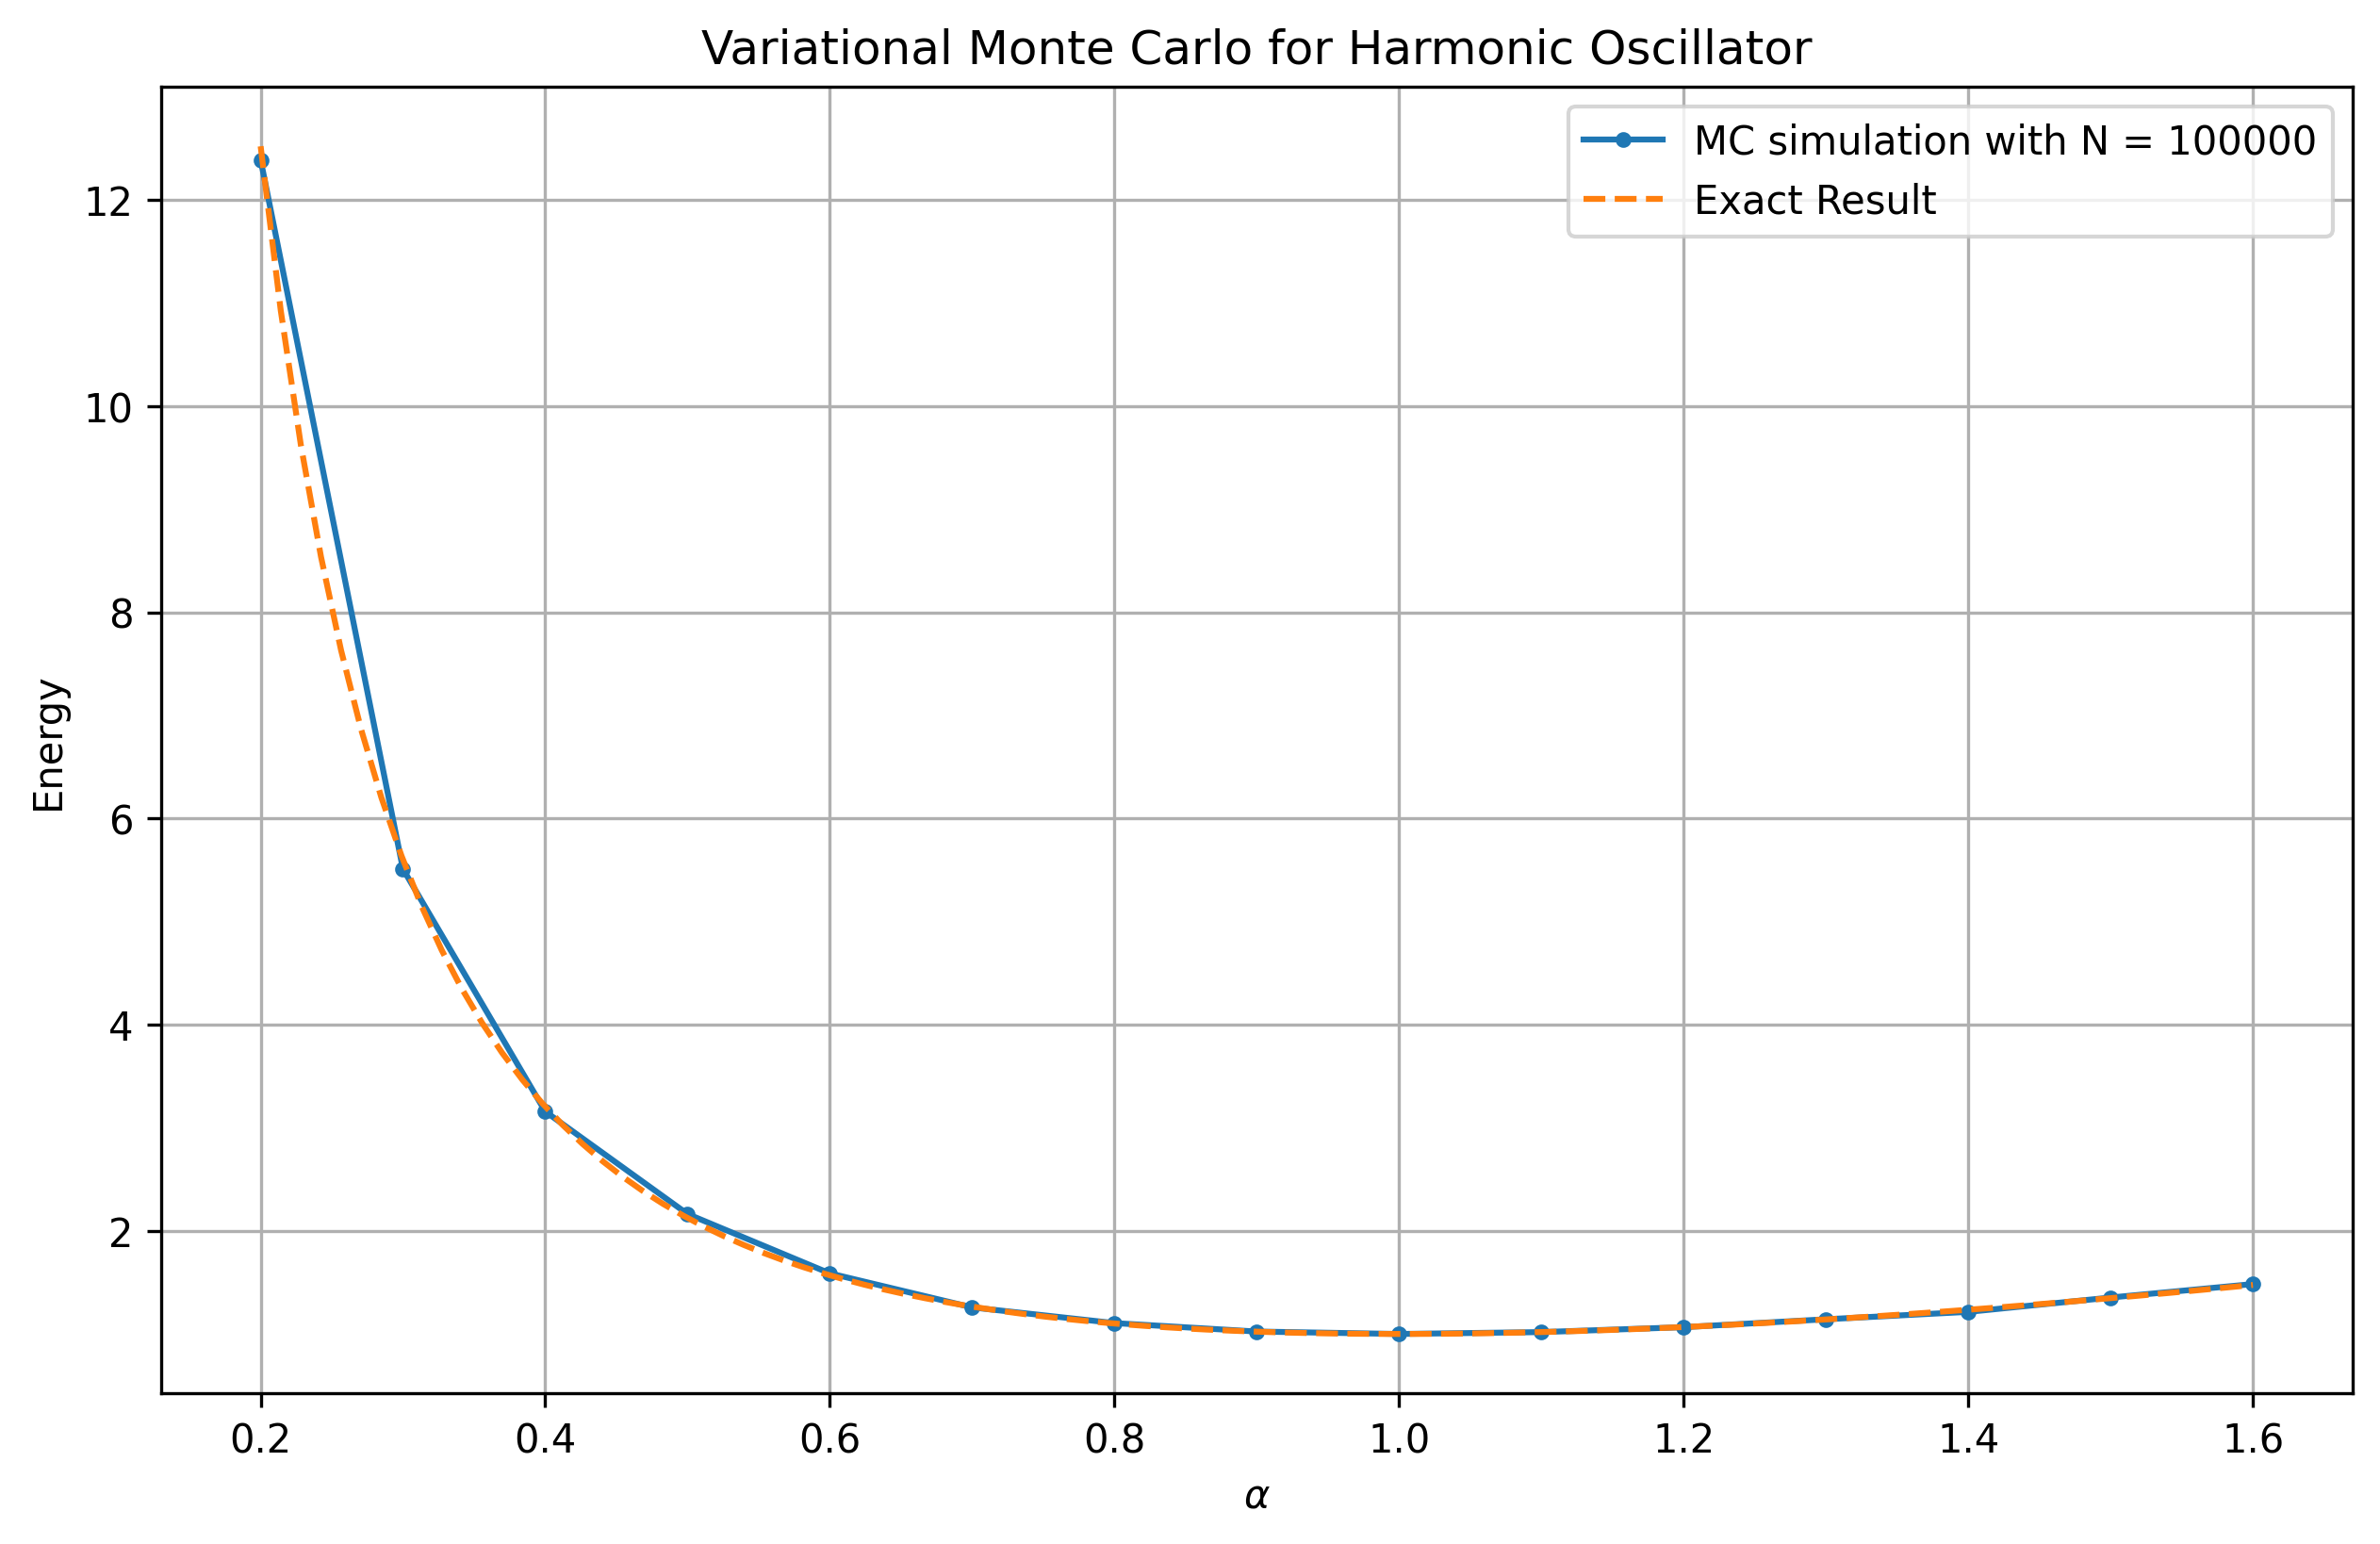

    alpha  Mean Energy(E)  Variance(E)
0     0.2       12.388797   306.043202
1     0.3        5.510387    57.136995
2     0.4        3.157578    17.719574
3     0.5        2.163516     7.343451
4     0.6        1.587615     2.903932
5     0.7        1.257461     1.152117
6     0.8        1.105380     0.428156
7     0.9        1.023439     0.093343
8     1.0        1.000000     0.000000
9     1.1        1.018066     0.074399
10    1.2        1.065769     0.269472
11    1.3        1.142640     0.593857
12    1.4        1.214276     1.084877
13    1.5        1.353273     1.638213
14    1.6        1.483903     2.285606


In [2]:
@numba.njit
def trial_wave_func_1(x,alpha):
    return alpha**0.5/np.pi**0.25*np.exp(-x**2*alpha**2/2)

@numba.njit
def harm_osc_energy(x, alpha):
    return alpha**2 + x**2 * (1 - alpha**4)

@numba.njit
def exact_energy(alpha):
    return alpha**2/2 + 1/(2*alpha**2)

@numba.njit
def metropolis_sample(alpha,step,mcs):
    x_list = [np.random.uniform(-step, step)]
    # s = np.linspace(-step,step,mcs)
    for _ in range(mcs):
        delta_x = np.random.uniform(-1,1)*step
        x_new = x_list[-1] + delta_x
        prob_ratio = trial_wave_func_1(x_new, alpha)**2/trial_wave_func_1(x_list[-1], alpha)**2
        if prob_ratio > np.random.uniform(0,1):
            x_list.append(x_new)
        else:
            x_list.append(x_list[-1]) 
    return x_list


mcs = int(1e5)
step_size = 2
mean_energy = []
var_energy = []
alpha_list_1 = np.linspace(0.2, 1.6,15)
alpha_list_2 =np.linspace(0.2,1.6,100)

exact_energy_list = [exact_energy(i) for i in alpha_list_2]

for alpha in alpha_list_1:
    X_list = np.array(metropolis_sample(alpha,step_size,mcs))
    var_e = np.var(harm_osc_energy(X_list,alpha)[mcs//2:])
    m_e = np.mean(harm_osc_energy(X_list,alpha)[mcs//2:])
    mean_energy.append(m_e)
    var_energy.append(var_e)
 
data = {
    'alpha':alpha_list_1,
    'Mean Energy(E)':mean_energy,
    'Variance(E)':var_energy
} 
df = pd.DataFrame(data)


    
plt.figure(figsize=(10,6),dpi = 300)
plt.plot(alpha_list_1,mean_energy,'.-',label='MC simulation with N = 100000')
plt.plot(alpha_list_2,exact_energy_list,'--',label = 'Exact Result')
plt.grid()
plt.title('Variational Monte Carlo for Harmonic Oscillator')
plt.xlabel('$\\alpha$')
plt.ylabel('Energy')
plt.savefig('hc.pdf',dpi = 300)
plt.legend()
plt.show()
print(df)